# Working With Image Data

In [13]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [2]:
# digits is a dictionary with the following keys
# 1) 'data'        : 
#       List of all images, where each image is represented as a 1 x 64 numpy array
# 2) 'target'      : 
#       List of all target labels that correspond to the images in 'data'.
# 3) 'target_names': 
#       Gives the list of digits (0 - 9). Each digit has about 180 images
# 4) 'images'      : 
#       Gives the 8 x 8 images as a numpy array. There are 1797 images in total
#       in the dataset.
# 5) 'DESCR'       : 
#       Gives the description of the digtis dataset
digits = sklearn.datasets.load_digits()
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

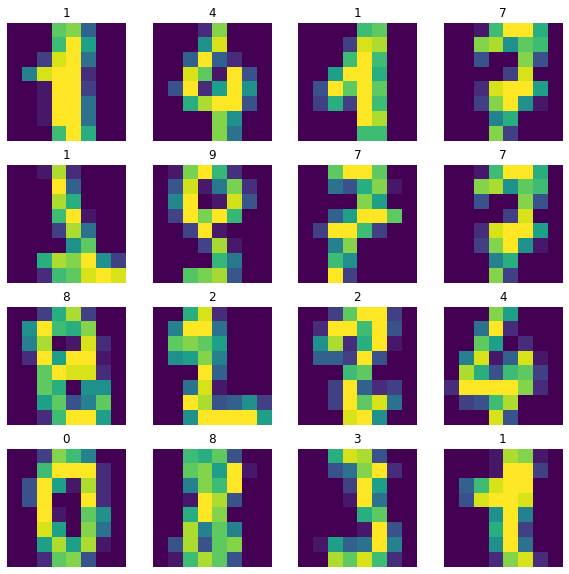

In [3]:
#A sample of the images in the data set.
fig, axes = plt.subplots(4, 4, figsize = (10, 10))

samples = np.array([
    [1,     100,  200, 300],
    [1000, 1100, 1200, 300],
    [500,   600,  700, 800],
    [20,     40,   60,  80]
])

for row in range(0, 4):
    for col in range(0, 4):
        current_image = digits['data'][samples[row, col]].reshape(8,8)
        axes[row, col].set_title(str(digits['target'][samples[row, col]]))
        axes[row, col].axis('off')
        axes[row, col].imshow(current_image)
        


# Models For Classifying Digits

## K Nearest Neighbors

In [4]:
from sklearn.neighbors import KNeighborsClassifier

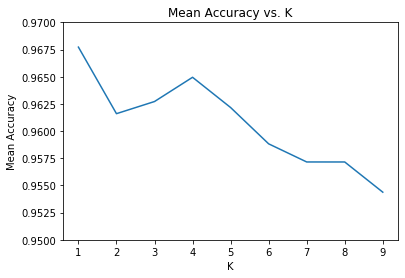

In [5]:
def train(features, targets, k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(features, targets)
    
    return model

def test(model, features, actual_targets):
    predicted_targets = model.predict(features)
    accuracy = accuracy_score(actual_targets, predicted_targets)
    
    return accuracy 
    
def cross_validate(n_splits = 4, k = 5):
    accuracies = []
    kf = KFold(n_splits = n_splits, random_state = 2)
    
    for train_index, test_index in kf.split(digits['data']):
        X_train = digits['data'][train_index]
        Y_train = digits['target'][train_index]
        
        X_test = digits['data'][test_index]
        Y_test = digits['target'][test_index]
        
        model = train(X_train, Y_train, k)
        accuracy = test(model, X_test, Y_test)
        
        accuracies.append(accuracy)
    
    return np.mean(accuracies)

k_s = list(range(1, 10))
mean_accuracies = []

for k in k_s:
    mean_accuracy = cross_validate(k = k)
    mean_accuracies.append(mean_accuracy)
    
plt.plot(k_s, mean_accuracies)
plt.ylim(0.95, 0.97)
plt.title("Mean Accuracy vs. K")
plt.xlabel("K")
plt.ylabel("Mean Accuracy")
plt.show()

## Neural Network with One Layer

In [6]:
from sklearn.neural_network import MLPClassifier

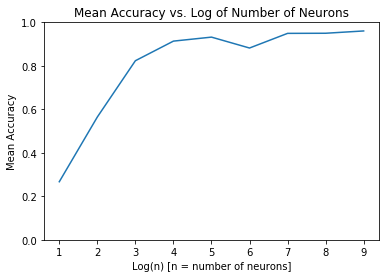

In [19]:
def train(features, targets, k):
    model = MLPClassifier(hidden_layer_sizes = (k, ))
    model.fit(features, targets)
    
    return model

def test(model, features, actual_targets):
    predicted_targets = model.predict(features)
    accuracy = accuracy_score(actual_targets, predicted_targets)
    
    return accuracy 
    
def cross_validate(k, n_splits = 4):
    accuracies = []
    kf = KFold(n_splits = n_splits, random_state = 2)
    
    for train_index, test_index in kf.split(digits['data']):
        X_train = digits['data'][train_index]
        Y_train = digits['target'][train_index]
        
        X_test = digits['data'][test_index]
        Y_test = digits['target'][test_index]
        
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            model = train(X_train, Y_train, k)
          
        accuracy = test(model, X_test, Y_test)
        accuracies.append(accuracy)
    
    return np.mean(accuracies)

k_s = list(range(1, 10))
mean_accuracies = []

for k_ in k_s:
    mean_accuracy = cross_validate(k = (2 ** k_))
    mean_accuracies.append(mean_accuracy)
    
plt.plot(k_s, mean_accuracies)
plt.ylim(0, 1)
plt.title("Mean Accuracy vs. Log of Number of Neurons")
plt.xlabel("Log(n) [n = number of neurons]")
plt.ylabel("Mean Accuracy")
plt.show()

## Neural Network with Two Layers

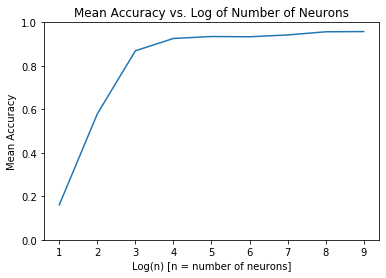

In [20]:
def train(features, targets, k):
    model = MLPClassifier(hidden_layer_sizes = (k, k, ))
    model.fit(features, targets)
    
    return model

def test(model, features, actual_targets):
    predicted_targets = model.predict(features)
    accuracy = accuracy_score(actual_targets, predicted_targets)
    
    return accuracy 
    
def cross_validate(k, n_splits = 4):
    accuracies = []
    kf = KFold(n_splits = n_splits, random_state = 2)
    
    for train_index, test_index in kf.split(digits['data']):
        X_train = digits['data'][train_index]
        Y_train = digits['target'][train_index]
        
        X_test = digits['data'][test_index]
        Y_test = digits['target'][test_index]
        
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            model = train(X_train, Y_train, k)
          
        accuracy = test(model, X_test, Y_test)
        accuracies.append(accuracy)
    
    return np.mean(accuracies)

k_s = list(range(1, 10))
mean_accuracies = []

for k_ in k_s:
    mean_accuracy = cross_validate(k = (2 ** k_))
    mean_accuracies.append(mean_accuracy)
    
plt.plot(k_s, mean_accuracies)
plt.ylim(0, 1)
plt.title("Mean Accuracy vs. Log of Number of Neurons")
plt.xlabel("Log(n) [n = number of neurons]")
plt.ylabel("Mean Accuracy")
plt.show()